## Deep Learning Lab-3
### Universidad del Valle de Guatemala
#### Nombres: Pablo Gonzalez 20362
#### Jose Hernandez: 20053

In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv('data/SunSpots.csv')

##### Visualizacion de datos

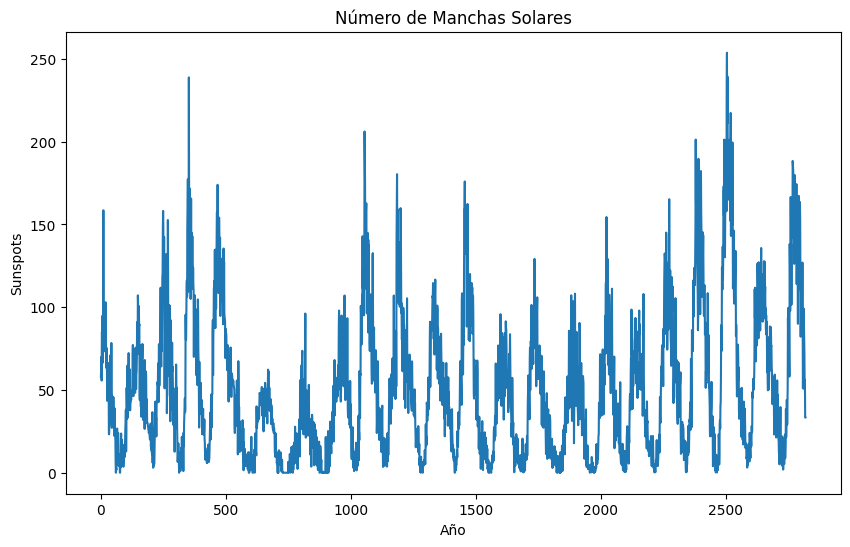

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data['Sunspots'])
plt.title('Número de Manchas Solares')
plt.xlabel('Año')
plt.ylabel('Sunspots')
plt.show()


#### Manejo de datos

In [6]:
# Divide la columna 'Month' en 'year' y 'month'
data['year'] = data['Month'].str.split('-').str[0].astype(int)
data['month'] = data['Month'].str.split('-').str[1].astype(int)

data.rename(columns={'Month': 'date'}, inplace=True)

In [7]:
data

,date,Sunspots,year,month
0,1749-01,58.0,1749,1
1,1749-02,62.6,1749,2
2,1749-03,70.0,1749,3
3,1749-04,55.7,1749,4
4,1749-05,85.0,1749,5
...,...,...,...,...
2815,1983-08,71.8,1983,8
2816,1983-09,50.3,1983,9
2817,1983-10,55.8,1983,10
2818,1983-11,33.3,1983,11


In [19]:
data.dtypes

date         object
Sunspots    float64
year          int32
month         int32
dtype: object

### Feed Forward NN (Red Simple)


In [10]:
X = data[['year','month']]
y = data[['Sunspots']]
X = np.asarray(X)
y = np.asarray(y)

In [22]:
from sklearn.model_selection import train_test_split
#X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [27]:
from keras.layers import Dropout
from keras.regularizers import l2
batched_model = Sequential([
    Dense(64, input_shape=(2,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
]);

In [28]:
batched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_squared_error']
)

In [30]:
batched_model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/100
53/53 - 0s - loss: 1600.5444 - mean_squared_error: 1600.5444 - val_loss: 1398.3248 - val_mean_squared_error: 1398.3248 - 287ms/epoch - 5ms/step
Epoch 2/100
53/53 - 0s - loss: 1598.6608 - mean_squared_error: 1598.6608 - val_loss: 1361.5128 - val_mean_squared_error: 1361.5128 - 195ms/epoch - 4ms/step
Epoch 3/100
53/53 - 0s - loss: 1601.4762 - mean_squared_error: 1601.4762 - val_loss: 1629.2100 - val_mean_squared_error: 1629.2100 - 186ms/epoch - 4ms/step
Epoch 4/100
53/53 - 0s - loss: 1709.3123 - mean_squared_error: 1709.3123 - val_loss: 1493.0222 - val_mean_squared_error: 1493.0222 - 221ms/epoch - 4ms/step
Epoch 5/100
53/53 - 0s - loss: 1700.7971 - mean_squared_error: 1700.7971 - val_loss: 1496.5519 - val_mean_squared_error: 1496.5519 - 199ms/epoch - 4ms/step
Epoch 6/100
53/53 - 0s - loss: 1641.4071 - mean_squared_error: 1641.4071 - val_loss: 1455.4154 - val_mean_squared_error: 1455.4154 - 211ms/epoch - 4ms/step
Epoch 7/100
53/53 - 0s - loss: 1654.0469 - mean_squared_error: 1

In [36]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# make predictions
train_predict = batched_model.predict(X_train)
test_predict = batched_model.predict(X_test)
# Mean square error
print_error(y_train, y_test, train_predict, test_predict)


18/18 [==============================] - 0s 1ms/step
Train RMSE: 40.158 RMSE
Test RMSE: 42.282 RMSE


In [38]:
test_predict

array([[34.283672 ],
       [47.48107  ],
       [16.200823 ],
       [48.902546 ],
       [75.46359  ],
       [62.740612 ],
       [31.774742 ],
       [84.35828  ],
       [51.51866  ],
       [19.796741 ],
       [53.533222 ],
       [36.500698 ],
       [51.154926 ],
       [61.046375 ],
       [18.15271  ],
       [56.432945 ],
       [76.92654  ],
       [61.762196 ],
       [50.191273 ],
       [52.93985  ],
       [69.83866  ],
       [18.895775 ],
       [47.065556 ],
       [17.011288 ],
       [31.897945 ],
       [48.329914 ],
       [32.95865  ],
       [57.341167 ],
       [55.014652 ],
       [17.176487 ],
       [46.648594 ],
       [42.943333 ],
       [49.75819  ],
       [14.174218 ],
       [44.40167  ],
       [39.14709  ],
       [35.25012  ],
       [55.05443  ],
       [39.66909  ],
       [19.023457 ],
       [54.060406 ],
       [56.30152  ],
       [69.05863  ],
       [48.95524  ],
       [36.085743 ],
       [48.658485 ],
       [92.16351  ],
       [31.94

### Red neuronal RNN

In [39]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(
        hidden_units
        , input_shape=input_shape
        , activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = pd.read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [ ]:
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y